In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('default')
from sklearn import datasets

from sklearn.decomposition import PCA

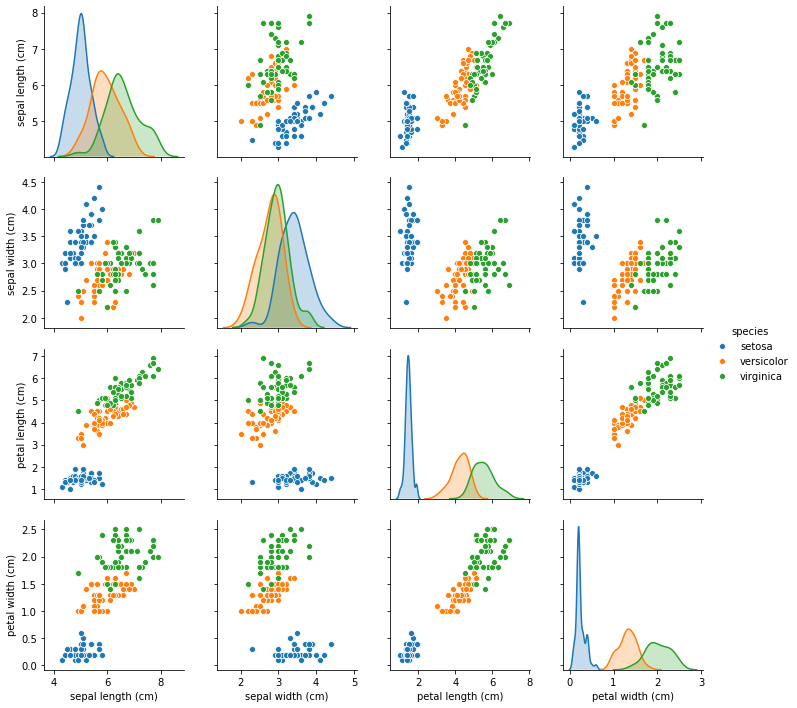

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]
sns.pairplot(df_iris, hue='species')
plt.show()

In [4]:
X = iris.data
Y = iris.target

In [5]:
u, s, vT = np.linalg.svd(X)

In [8]:
np.diag(s)

array([[95.95991387,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46093093,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.88482631]])

In [11]:
x = np.matmul(np.matmul(u[:,:2],np.diag(s[:2])),vT[:2,:2])

In [6]:
np.shape(u), np.shape(s), np.shape(vT)

((150, 150), (4,), (4, 4))

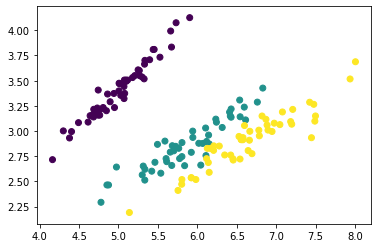

In [12]:
plt.scatter(x[:,0],x[:,1], c=Y)

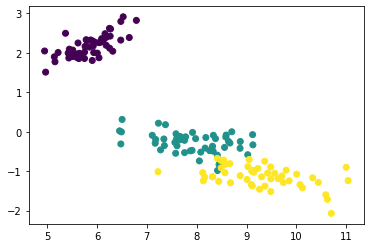

In [14]:
from sklearn.decomposition import TruncatedSVD
tSVD = TruncatedSVD(2)
tSVD.fit(X)
x = tSVD.transform(X)
plt.scatter(x[:,0],x[:,1], c=Y)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [18]:
df = pd.read_csv('./titanic/train.csv', index_col = 0)
df2 = pd.get_dummies(df.Sex, prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2['Fare'] = df.Fare
df2 = pd.concat([df2, pd.get_dummies(df.Embarked,prefix='Embarked')], axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name], index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2, pd.get_dummies(title, prefix='title')], axis=1)
df2
X = df2.values
Y = df.Survived

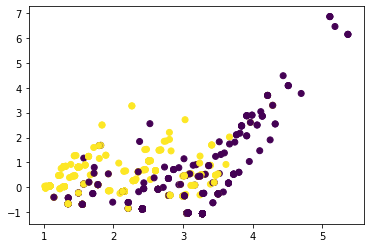

In [16]:
tSVD = TruncatedSVD(2)
tSVD.fit(X)
x = tSVD.transform(X)
plt.scatter(x[:,0],x[:,1], c=Y)

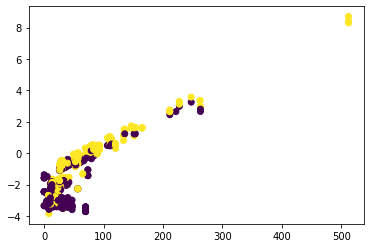

In [19]:
tSVD = TruncatedSVD(2)
tSVD.fit(X)
x = tSVD.transform(X)
plt.scatter(x[:,0],x[:,1], c=Y)

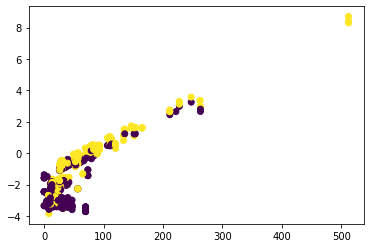

In [20]:
 tSVD = TruncatedSVD(4)
tSVD.fit(X)
x = tSVD.transform(X)
plt.scatter(x[:,0],x[:,1], c=Y)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


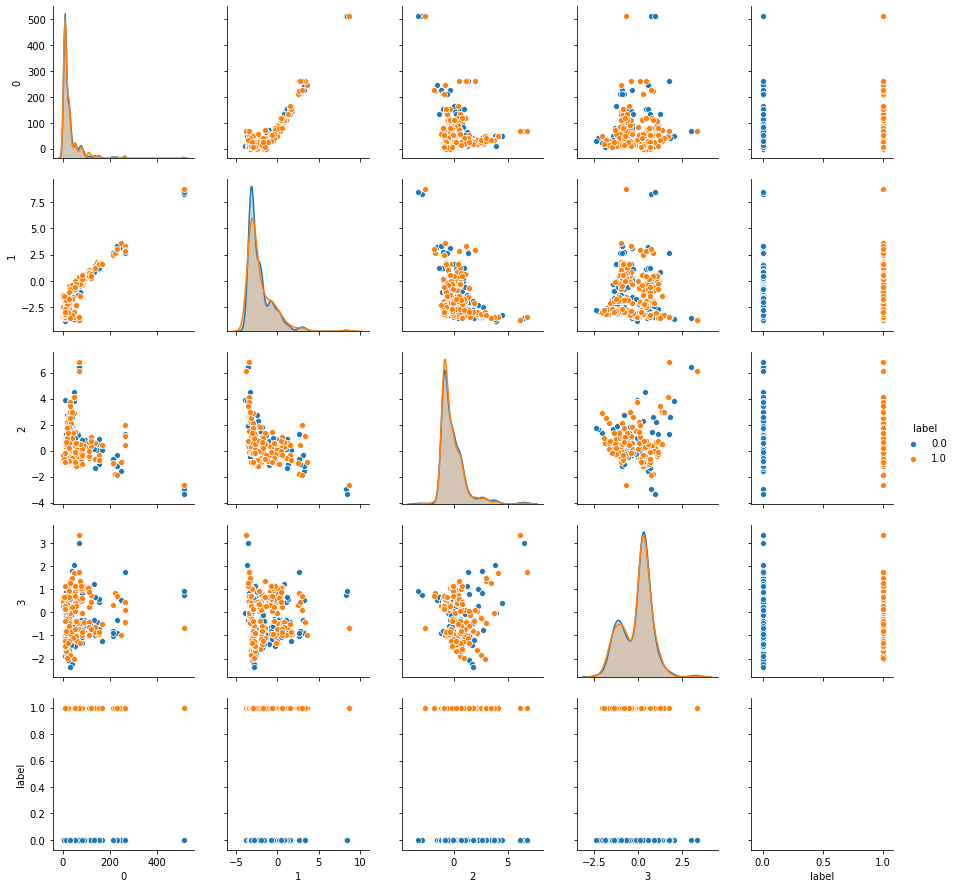

In [21]:
df3 = pd.DataFrame(x)
df3['label'] = df.Survived
sns.pairplot(df3, hue='label')